# Lesson 2: Regression

## Review

**Question** What is regression? 

**Question** What kind of data do we usually use for regression? 

Let's review the example we saw last time. The code below reads our data points from a file and then creates a scatterplot.

Text(0, 0.5, 'Price ($)')

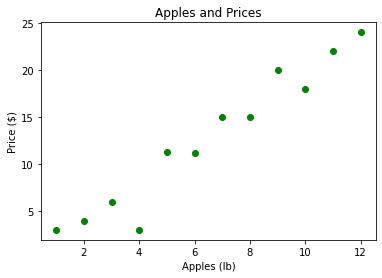

In [1]:
# import necessary libraries
import pandas 
import numpy 
import matplotlib.pyplot as plt 

# read data from the synthetic data file
data = pandas.read_csv("../assets/regression-synthetic.csv") 

# plot data and label the x-axis and y-axis
plt.scatter(data['apple'], data['prices'], color='green')
plt.title("Apples and Prices")
plt.xlabel("Apples (lb)")
plt.ylabel("Price ($)")

We were using this data as an example to see if given a few data points about apple quantities and their prices, if we could learn an equation (like the linear equation of the form $y = mx + c$) from the data

In the last class, we saw how one black line that we learned was the "best fit" for the data. But this poses many questions.
1. How do we know that that line is the best fit? 
2. Is it possible that there are other lines that are best for the data? 

We will answer all of these questions and more in detail as part of this lecture. First, let us see how to decide if any given line is the "best fit" for the data. In order to do so, we need to see what are the other candidate lines for our analysis and how to calculate error. 

Text(0, 0.5, 'Price ($)')

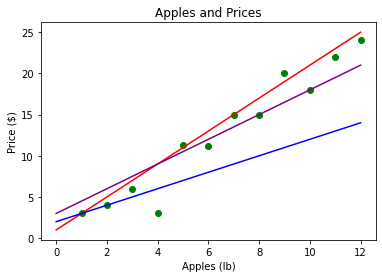

In [2]:
# Plot the linear regression line in the same plot 
x = numpy.linspace(0, 12, 1000)
plt.scatter(data['apple'], data['prices'], color='green')
plt.plot(x, 2*x+1, color='red')
plt.plot(x, 1*x+2, color='blue')
plt.plot(x, 1.5*x+3, color='purple')
plt.title("Apples and Prices")
plt.xlabel("Apples (lb)")
plt.ylabel("Price ($)")

**Question** Can you guess which line would be the best fitting line? 

As you may have guessed, the best fitting line is the one that is closest to most of the points! In our case, we can see that many points even go through the line itself, which this is not necessarily true. But this brings us closer to describing a measure that allows us to determine what the best line is. 

Text(0, 0.5, 'Price ($)')

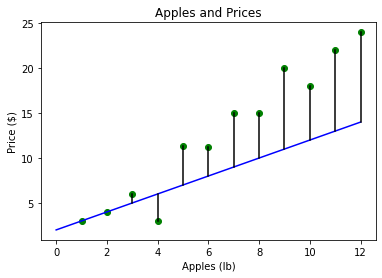

In [3]:
# Best fitting line errors 
x = numpy.linspace(0, 12, 1000)
plt.scatter(data['apple'], data['prices'], color='green')
plt.plot(x, 1*x+2, color='blue')

xData = numpy.array(data['apple'])
yData = numpy.array(data['prices'])
modelPredictions = numpy.array([1*x+2 for x in xData])

# now add individual line for each point
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) # same X
    lineYdata = (yData[i], modelPredictions[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black')

plt.title("Apples and Prices")
plt.xlabel("Apples (lb)")
plt.ylabel("Price ($)")

In [4]:
# calculate error
error1 = abs(yData - modelPredictions)
print("Residual errors are: ", numpy.sqrt(numpy.mean(error1)))

Residual errors are:  2.169869427715256


Text(0, 0.5, 'Price ($)')

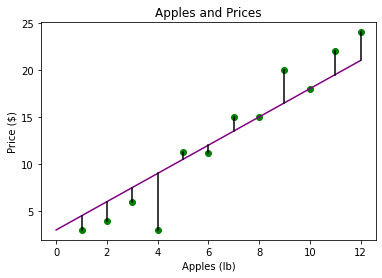

In [5]:
# Best fitting line errors 
x = numpy.linspace(0, 12, 1000)
plt.scatter(data['apple'], data['prices'], color='green')
plt.plot(x, 1.5*x+3, color='purple')

xData = numpy.array(data['apple'])
yData = numpy.array(data['prices'])
modelPredictions = numpy.array([1.5*x+3 for x in xData])

# now add individual line for each point
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) # same X
    lineYdata = (yData[i], modelPredictions[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black')

plt.title("Apples and Prices")
plt.xlabel("Apples (lb)")
plt.ylabel("Price ($)")

In [6]:
# calculate error
error2 = abs(yData - modelPredictions)
print("Residual errors are: ", numpy.sqrt(numpy.mean(error2)))

Residual errors are:  1.3874436925511608


Text(0, 0.5, 'Price ($)')

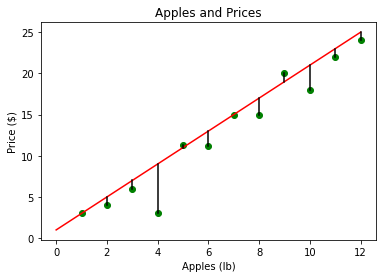

In [7]:
# Best fitting line errors 
x = numpy.linspace(0, 12, 1000)
plt.scatter(data['apple'], data['prices'], color='green')
plt.plot(x, 2*x+1, color='red')

xData = numpy.array(data['apple'])
yData = numpy.array(data['prices'])
modelPredictions = numpy.array([2*x+1 for x in xData])

# now add individual line for each point
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) # same X
    lineYdata = (yData[i], modelPredictions[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black')

plt.title("Apples and Prices")
plt.xlabel("Apples (lb)")
plt.ylabel("Price ($)")

In [8]:
# calculate error
error3 = abs(yData - modelPredictions)
print("Residual errors are: ", numpy.sqrt(numpy.mean(error3)))

Residual errors are:  1.2281422284627028


That is how we determine that the red line is the "best fitting" line! It is the line with the least amount of residual error! 

While here, we have determined that linear regression is the best choice for prediction, keep in mind that for more complex data sets, a curved line could also fit the data very well. Whenever visualization is possible, we should try to see what we can try to learn

# Regression for the World Happiness Dataset

We're going to take the World Happiness Dataset we examined last time and apply regression to it. 


In [61]:
# Load World Happiness Data
import pandas as pd
df = pd.read_csv("../assets/happiness2019dataset/2015.csv")

# View first five rows of the dataset
df.head()

#Scale and normalize data 
from sklearn.preprocessing import StandardScaler
df = df[["Happiness Score", 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
# Separate training and testing datasets

regression_data=df.sample(frac=0.9,random_state=200) #random state is a seed value
regression_test_data = df.drop(regression_data.index)

#regression_data = regression_data.iloc[:150]
#regression_test_data = regression_data.iloc[-8:]
ss = StandardScaler()

We've seen how to do classification and clustering on this dataset now. We will now see if we can predict happiness score for a new country by learning a linear regression model using just one feature. We can use all the features to fit a linear model, but if the true data does not adhere to a linear model, then this will not give us good answers. For the sake of examples and demonstration, we will use a single feature first. We will see if we can use Economy as a feature for predicting the Happiness score. 

First, we visualize how the Happiness score changes with the economy. We can see how a linear fit would help us predict the happiness, given any value for the Economy variable for a new city. 

Text(0.5, 0, 'Economy (GDP per capita) standardized')

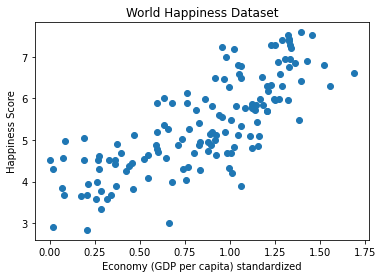

In [62]:
plt.scatter(regression_data['Economy (GDP per Capita)'],regression_data['Happiness Score'])
plt.title('World Happiness Dataset')
plt.ylabel('Happiness Score')
plt.xlabel('Economy (GDP per capita) standardized')

Text(0.5, 0, 'Economy (GDP per capita) standardized')

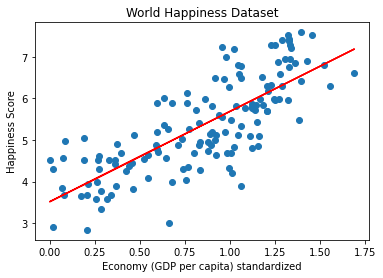

In [69]:
# import Linear model from libary
from sklearn import linear_model

# create a linear regression model variable
reg = linear_model.LinearRegression()
reg.fit(numpy.array(regression_data['Economy (GDP per Capita)']).reshape(-1,1), numpy.array(regression_data['Happiness Score']))

# plot data with the fitted line 
plt.scatter(regression_data['Economy (GDP per Capita)'],regression_data['Happiness Score'])
plt.plot(regression_data['Economy (GDP per Capita)'], reg.coef_*regression_data['Economy (GDP per Capita)']+reg.intercept_, color='red')
plt.title('World Happiness Dataset')
plt.ylabel('Happiness Score')
plt.xlabel('Economy (GDP per capita) standardized')

The slope and intercept of the best fitting line is given by: 

In [70]:
print("Slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Slope:  [2.16744149]
Intercept:  3.5174360396774573


Now, if you are given the economy data for a new country, you will be able to use the model to predict what the happiness score would be! Let's take an example. 

In [71]:
predictions = reg.predict(numpy.array(regression_test_data['Economy (GDP per Capita)']).reshape(-1,1))
true_data = numpy.array(regression_test_data['Happiness Score'])

# Measure mean square error between the true data and the predictions 
mse = abs(true_data - predictions)
print("Residual errors are: ", numpy.sqrt(numpy.mean(mse)))

Residual errors are:  0.803664743928878


**Activity** Perform linear regression using the feature Health (Life Expectancy) to predict the happiness score. 

**Activity Answers and Code** 

We can begin by visualizing the data to see if we think the data is roughly linear. 

Text(0.5, 0, 'Health (Life Expectancy) standardized')

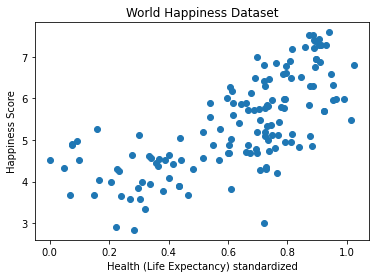

In [72]:
plt.scatter(regression_data['Health (Life Expectancy)'],regression_data['Happiness Score'])
plt.title('World Happiness Dataset')
plt.ylabel('Happiness Score')
plt.xlabel('Health (Life Expectancy) standardized')

Text(0.5, 0, 'Health (Life Expectancy) standardized')

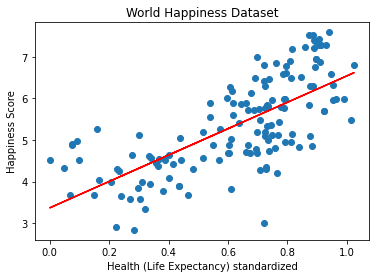

In [73]:
# create a linear regression model variable
reg = linear_model.LinearRegression()
reg.fit(numpy.array(regression_data['Health (Life Expectancy)']).reshape(-1,1), numpy.array(regression_data['Happiness Score']))

# plot data with the fitted line 
plt.scatter(regression_data['Health (Life Expectancy)'],regression_data['Happiness Score'])
plt.plot(regression_data['Health (Life Expectancy)'], reg.coef_*regression_data['Health (Life Expectancy)']+reg.intercept_, color='red')
plt.title('World Happiness Dataset')
plt.ylabel('Happiness Score')
plt.xlabel('Health (Life Expectancy) standardized')

In [74]:
print("Slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Slope:  [3.1672328]
Intercept:  3.3695351268018485


In [75]:
predictions = reg.predict(numpy.array(regression_test_data['Health (Life Expectancy)']).reshape(-1,1))
true_data = numpy.array(regression_test_data['Happiness Score'])

# Measure mean square error between the true data and the predictions 
mse = abs(true_data - predictions)
print("Residual errors are: ", numpy.sqrt(numpy.mean(mse)))

Residual errors are:  0.7755722013007197
